In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from symfit import parameters, variables, sin, cos, Fit

## Loading points

In [2]:
loaded = np.load('points.npz', allow_pickle=True)

In [8]:
class SnakeFitter:
    def __init__(self, all_x, all_y, collect_x, collect_y, new_x, new_y, n=7):
        self.ax = all_x
        self.ay = all_y
        self.cx = collect_x
        self.cy = collect_y
        self.nx = new_x
        self.ny = new_y
        self.n = n
    
    def fourier_series(self, x, f):
        """
        Returns a symbolic fourier series of order `n`.

        :param n: Order of the fourier series.
        :param x: Independent variable
        :param f: Frequency of the fourier series
        """
        # Make the parameter objects for all the terms
        a0, *cos_a = parameters(','.join(['a{}'.format(i) for i in range(0, self.n + 1)]))
        sin_b = parameters(','.join(['b{}'.format(i) for i in range(1, self.n + 1)]))
        # Construct the series
        series = a0 + sum(ai * cos(i * f * x) + bi * sin(i * f * x)
                         for i, (ai, bi) in enumerate(zip(cos_a, sin_b), start=1))
        return series
    
    def fit(self, k=0):
        x, y = variables('x, y')
        self.w, = parameters('w')
        model_dict = {y: self.fourier_series(x, f=self.w)}
        print(model_dict)

        # Make step function data
        xdata = self.nx[k]
        ydata = self.ny[k]
        # Define a Fit object for this model and data
        fit = Fit(model_dict, x=xdata, y=ydata)
        self.fit_result = fit.execute()
        self.a0 = self.fit_result.params['a0']
        self.w = self.fit_result.params['w']
        self.cos_a = [self.fit_result.params['a'+str(j)] for j in range(1,self.n)]
        self.sin_b = [self.fit_result.params['b'+str(j)] for j in range(1,self.n)]
        
    def get_value(self, x):
        series = self.a0 + sum(ai*np.cos(i*self.w*x)+bi*np.sin(i*self.w*x) 
                               for i,(ai,bi) in enumerate(zip(self.cos_a, self.sin_b), start=1))
        return series
    
    def plot_graph(self, k=0):
        xd, yd, yn = self.nx[k], self.ny[k], self.get_value(self.nx[k])
        plt.plot(xd, yd, 'g', label='data')
        plt.plot(xd, yn, 'r.', label='fit')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.show()
    
    def phase_calculator(self):
        for i in range(len(self.cy)):
            min_dist = 100000000000000000000
            min_ind = -1
            for j in range(i+1, len(self.cy)):
                if len(self.cy[i])==len(self.cy[j]):
                    dist = np.linalg.norm(np.array(self.cy[i])-np.array(self.cy[j]))
                else:
                    common_length = min(len(self.cy[i]),len(self.cy[j]))
                    dist = np.linalg.norm(np.array(self.cy[i][:common_length])-np.array(self.cy[j][:common_length]))
                if dist < min_dist:
                    min_dist = dist
                    min_ind = j
            break
        print(min_ind)
        self.manual_time_period = min_ind

In [9]:
obj = SnakeFitter(loaded['ax'], loaded['ay'], loaded['cx'], loaded['cy'], loaded['nx'], loaded['ny'], n=7)

In [10]:
obj.fit(k=10)

{y: a0 + a1*cos(w*x) + a2*cos(2*w*x) + a3*cos(3*w*x) + a4*cos(4*w*x) + a5*cos(5*w*x) + a6*cos(6*w*x) + a7*cos(7*w*x) + b1*sin(w*x) + b2*sin(2*w*x) + b3*sin(3*w*x) + b4*sin(4*w*x) + b5*sin(5*w*x) + b6*sin(6*w*x) + b7*sin(7*w*x)}


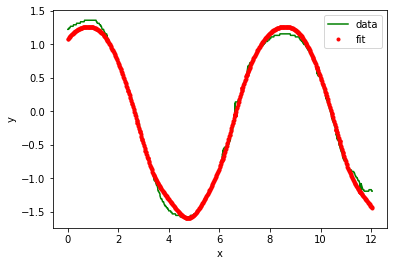

In [11]:
obj.plot_graph(k=10)

In [12]:
obj.phase_calculator()

160
